In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")
test = pd.read_csv("test.csv")

In [3]:
train["0"]

0        1.0
1        1.0
2       -2.0
3        1.0
4        0.0
        ... 
15995   -0.5
15996    0.0
15997   -0.5
15998    0.0
15999    0.0
Name: 0, Length: 16000, dtype: float64

<AxesSubplot:>

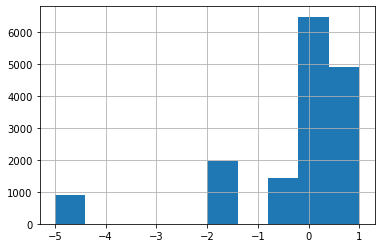

In [4]:
train["1"].hist()

In [5]:
train['Label'].replace(['Excellent',"good","fair","bad"],[1,2,3,4] , inplace = True)
val['Label'].replace(['Excellent',"good","fair","bad"],[1,2,3,4] , inplace = True)

In [6]:
x = np.arange(-100,0,0.5)
train_fix = train.replace(x,np.nan, inplace = False)

In [7]:
train_fix

,id,0,1,2,3,4,5,6,7,8,...,61,62,63,Hard E,Hard critical strain,Hard poisson's ratio,Soft E,Sotf critical strain,Soft poisson's ratio,Label
0,1_0001.01,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,50,0.02,0.07,100,0.35,0.00,2
1,1_0002.02,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,0.0,NaN,NaN,0,0.00,0.29,0,0.02,0.28,1
2,1_0003.02,NaN,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,700,0.03,0.09,50,0.34,0.06,1
3,1_0004.01,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1000,0.01,0.01,100,0.19,0.33,3
4,1_0005.02,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,900,0.03,0.18,100,0.01,0.11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,4_15996.02,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,650,0.04,0.21,50,0.04,0.12,2
15996,4_15997.02,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,800,0.01,0.15,100,0.03,0.14,2
15997,4_15998.01,NaN,0.0,NaN,0.0,NaN,NaN,0.0,1.0,NaN,...,NaN,NaN,NaN,150,0.01,0.09,50,0.38,0.12,1
15998,4_15999.02,0.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,600,0.00,0.10,100,0.03,0.15,2


In [8]:
train_fix = train_fix.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [9]:
train_val = pd.concat([train_fix, val],axis=0)


In [10]:
train.shape

(16000, 72)

In [11]:
X = train_val.drop(["id","Label"],axis = 1)
y = train_val["Label"]

<AxesSubplot:>

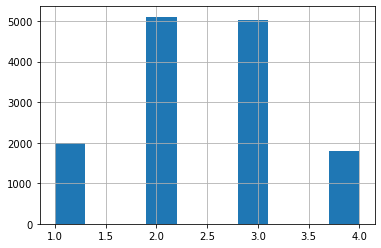

In [12]:
y.hist()

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split

<AxesSubplot:>

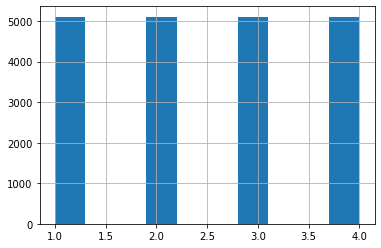

In [14]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

y.hist()

In [15]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [16]:
xg1 = XGBClassifier()
xg1=xg1.fit(X_train, y_train)
xg1.score(X_train,y_train)
xg1.score(X_val,y_val)

C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:54:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8929970617042116

In [17]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
n_estimators = np.arange(200,2100,100).tolist()

In [55]:
max_depth = 4

In [56]:
learning_rate = 0.2

In [57]:
colsample_bytree = 0.6

In [58]:
random_grid = {'n_estimators': n_estimators}

In [59]:
random_grid

{'n_estimators': [200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200,
  1300,
  1400,
  1500,
  1600,
  1700,
  1800,
  1900,
  2000]}

In [60]:
xg4 = XGBClassifier(random_state=42)

In [61]:
xg_random = RandomizedSearchCV(estimator = xg4, param_distributions=random_grid,
                              n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

xg_random.fit(X_train,y_train)
xg_random.best_params_

C:\Users\KYLE\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 19 is smaller than n_iter=100. Running 19 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 19 candidates, totalling 95 fits


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'n_estimators': 1900}

In [62]:
xg5 = XGBClassifier(random_state=42,n_estimators = 1900, max_depth = 4,learning_rate = 0.2,colsample_bytree = 0.6  )

In [63]:
xg5.fit(X_train,y_train)
xg5.score(X_val,y_val)

[20:07:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.91307541625857

In [64]:
xg5.fit(X,y)


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:08:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1900, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
#test = test.drop(["id"],axis =1)
test_RF = test 
y_pred = xg5.predict(test_RF)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["Label"])
y_pred_pd = y_pred_pd.reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)